Analysis of the data from the first data collection for the ETS scale. 

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import pingouin as pg
import preprocessor
import vizer
import modeler
from sklearn.preprocessing import StandardScaler


In [2]:
data_loc = Path.cwd().parent / "data"

# Show full dataframes when printing
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# load raw data
df_raw = pd.read_excel(data_loc / "ets_data.xlsx")

df_raw.head()

,1 (AE8),2 (Cx11),3 (Sp4),4 (C7),5 (Cx6),6 (Ex6),7 (C5),8 (Ex3),9 (AE3),10 (C8),11 (Cx4),12 (Ex8),13 (TO8),14 (AE5),15 (TO3),16 (TO1),17 (C4),18 (Se2),19 (TO10),20 (Ex2),21 (Cx3),22 (TO4),23 (Se1),24 (T3),25 (TO11),26 (Cx8),27 (C10),28 (Ex1),29 (T2),30 (T1),31 (Cx7),32 (AE6),33 (Em3),34 (Em8),35 (C6),36 (C2),37 (TO7),38 (AE2),39 (TO6),40 (TO5),41 (AE7),42 (C9),43 (AE1),44 (EM1),45 (Ex7),46 (Sp3),47 (Sp1),48 (TO2),49 (AE9),50 (Em9),51 (Em6),52 (Sp6),53 (C1),54 (Sp5),55 (C14),56 (Cx9),57 (Em4),58 (Ex4),59 (AE4),60 (TO12),61 (Cx1),62 (Em7) .,63 (C13),64 (Cx5),65 (Sp2),66 (Cx2),67 (Cx12),68 (C12),69 (Em5),70 (TO9),71 (Ex5),72 (C3),73 (Cx10),74 (Em2),75 (C15),76 (C11),77(RS1),Age,Gender,Ethnicity
0,5,4,4,3,5,3,3,4,4,4,4,3,3,4,4,4,4,4,4,4,4,4,4,3,4,3,5,3,3,4,4,4,4,3,3,3,4,4,5,5,3,5,5,5,5,3,5,5,4,3,3,4,3,4,4,4,3,4,3,3,4,4,2,4,5,4,5,4,4,4,4,4,4,3,4,5,2.0,5,3,5
1,5,4,3,3,4,2,2,3,3,3,4,3,3,3,4,3,3,4,3,4,2,4,3,5,4,2,5,2,5,4,2,3,3,3,3,4,3,4,3,4,2,4,4,5,5,3,3,4,4,4,4,3,2,2,4,2,4,5,4,2,2,4,4,2,3,3,3,5,3,3,4,4,3,4,3,5,3.0,4,3,5
2,3,3,2,3,3,2,3,2,3,4,2,3,2,1,3,3,3,3,3,1,1,2,1,1,2,1,2,5,3,1,3,2,2,4,4,3,3,2,3,3,2,3,4,3,4,1,3,4,2,1,1,3,3,3,2,2,1,4,1,3,2,1,1,1,1,1,2,2,2,2,1,3,2,1,3,4,1.0,4,3,5
3,5,5,5,5,5,5,5,5,6,5,5,5,4,5,5,5,5,3,5,5,5,5,4,5,5,5,3,5,5,5,3,5,5,5,5,5,5,5,5,5,2,5,5,5,3,5,5,5,5,5,5,5,5,5,3,5,5,5,5,5,5,5,1,5,5,5,5,5,5,5,5,5,5,5,5,5,2.0,5,3,3
4,1,2,3,6,3,2,3,4,4,2,3,3,3,3,3,4,3,2,3,3,4,2,3,2,3,3,2,3,2,2,2,3,3,1,4,3,3,5,3,3,3,2,4,3,1,2,4,4,3,2,3,3,3,3,2,4,3,3,4,2,3,1,2,4,3,3,2,2,3,3,3,3,4,2,2,2,2.0,3,3,5


In [3]:
# Clean up the column names
df_raw = preprocessor.clean_columns(df_raw)

# Start data cleaning
df = df_raw.copy()

# Reverse score the RS1 item - Note that I think this should be considered part of the connectedness question
# Formula for reverse scoring is: max_scale_value (6) + 1 - original_score
df["rs1_reversed"] = 6 + 1 - df["rs1"]

df.head()

,ae8,cx11,sp4,c7,cx6,ex6,c5,ex3,ae3,c8,cx4,ex8,to8,ae5,to3,to1,c4,se2,to10,ex2,cx3,to4,se1,t3,to11,cx8,c10,ex1,t2,t1,cx7,ae6,em3,em8,c6,c2,to7,ae2,to6,to5,ae7,c9,ae1,em1,ex7,sp3,sp1,to2,ae9,em9,em6,sp6,c1,sp5,c14,cx9,em4,ex4,ae4,to12,cx1,em7,c13,cx5,sp2,cx2,cx12,c12,em5,to9,ex5,c3,cx10,em2,c15,c11,rs1,age,gender,ethnicity,rs1_reversed
0,5,4,4,3,5,3,3,4,4,4,4,3,3,4,4,4,4,4,4,4,4,4,4,3,4,3,5,3,3,4,4,4,4,3,3,3,4,4,5,5,3,5,5,5,5,3,5,5,4,3,3,4,3,4,4,4,3,4,3,3,4,4,2,4,5,4,5,4,4,4,4,4,4,3,4,5,2.0,5,3,5,5.0
1,5,4,3,3,4,2,2,3,3,3,4,3,3,3,4,3,3,4,3,4,2,4,3,5,4,2,5,2,5,4,2,3,3,3,3,4,3,4,3,4,2,4,4,5,5,3,3,4,4,4,4,3,2,2,4,2,4,5,4,2,2,4,4,2,3,3,3,5,3,3,4,4,3,4,3,5,3.0,4,3,5,4.0
2,3,3,2,3,3,2,3,2,3,4,2,3,2,1,3,3,3,3,3,1,1,2,1,1,2,1,2,5,3,1,3,2,2,4,4,3,3,2,3,3,2,3,4,3,4,1,3,4,2,1,1,3,3,3,2,2,1,4,1,3,2,1,1,1,1,1,2,2,2,2,1,3,2,1,3,4,1.0,4,3,5,6.0
3,5,5,5,5,5,5,5,5,6,5,5,5,4,5,5,5,5,3,5,5,5,5,4,5,5,5,3,5,5,5,3,5,5,5,5,5,5,5,5,5,2,5,5,5,3,5,5,5,5,5,5,5,5,5,3,5,5,5,5,5,5,5,1,5,5,5,5,5,5,5,5,5,5,5,5,5,2.0,5,3,3,5.0
4,1,2,3,6,3,2,3,4,4,2,3,3,3,3,3,4,3,2,3,3,4,2,3,2,3,3,2,3,2,2,2,3,3,1,4,3,3,5,3,3,3,2,4,3,1,2,4,4,3,2,3,3,3,3,2,4,3,3,4,2,3,1,2,4,3,3,2,2,3,3,3,3,4,2,2,2,2.0,3,3,5,5.0


In [4]:
# Demographic cols
demo_cols = ["age", "gender", "ethnicity"]
# Get list of the scale columns - also remove rs1 before reverse scoring
scale_cols = [col for col in df.columns if col not in demo_cols and col != "rs1"]
# List of scale columns w/o the reverse coded item
scale_cols_no_rs1 = [col for col in scale_cols if col != "rs1_reversed"]

In [5]:
# Create total scores
df["ets_total"] = df[scale_cols].sum(axis=1)
df["ets_total_no_rs1"] = df[scale_cols_no_rs1].sum(axis=1)

## Correlation matrix

In [6]:
vizer.corr_matrix(df=df, cols=[col for col in df.columns if col not in demo_cols])

Note that once we have narrowed down our scale items more, we will want to use corrected inter-scale correlations. This re-calculates the total removing the each comparison variable. For example, with ae8, we would calculate the scale total without that item, and then get the correlation between ae8 and the rest of the scale, not including itself. That's a bit messy to do in code here and won't make much difference at all when we have this many items though, so we will reserve that for later. 

### Observations

- Inter-item correlations: Ideally these fall between 0.3 and 0.7. Not so low that it indicates the item is not measuring the same general construct as the others, and not so high that the item is redundant. 
    - I wouldn't remove any items immediately due to redundancy (very high correlations). 
    - We do have some items where almost all of the inter-item correlations are quite low. We should consider removing these items, but can figure this out as we do the EFA. 
        - ex6, se2, t3, c10, ex1, t2, c1, c14, c13, c12, and c3
- Item-total correlations: All items had at moderate to high correlations with the total scale, but not so high as to indicate redundancy. An exception to this is our reverse scored item. As expected, the items I'm suggesting we consider removing due to the inter-item correlations had also had the lowest item-total correlations. 

I don't think our reverse scored item is acting as we hoped. The correlations are very low with all individual items. This is a good indication that people weren't interpreting the question correctly. If they were, I'd expect it to at least have moderate correlations with the connection related items. I can think of a few reasons as to why this happened, but for now we should remove the item from any factor analysis. We will need to figure out how to discuss it in the paper. I think we can generally justify the exclusion of reverse scored items, as the practice of including them seems to have become less common. I found sources related to reasons to exclude them if needed. 

Before jumping into our Factor Analysis, lets get some reliability calculations out of the way. 

## Reliability Analysis/Internal Consistency.
If items are measuring the same latent variable, they should be strongly correlated. The most common way to measure reliability/internal consistency is Coefficient Alpha (aka Cronbach's Alpha). 

In [7]:
print(
    "Cronbach's Alpha on all items (except the reverse scored item): ",
    pg.cronbach_alpha(df[scale_cols_no_rs1]),
)

Cronbach's Alpha on all items (except the reverse scored item):  (np.float64(0.9761929849678292), array([0.973, 0.979]))


This is excellent. A Cronbach's Alpha above 0.9 indicates excellent internal consistency. 

The first number above indicates the Cronbach's Alpha number, and the numbers in [] are the confidence interval. 

## Factor Analysis
Next we will move onto the Exploratory Factor Analysis (common factors). 

We need to do the following:
- Determine how many factors/components we have and want to keep. A mix of science and art here!
- Start to reduce the items in the scale as possible. 

We will use an EFA, with an oblique rotation since we have theoretically correlated factors. 

Since all of our items are on the same 6 point likert scale, there should be no need to standardize them before running the Factor Analysis. It can't cause any harm though, so lets go ahead and do it. 

In [8]:
# Standardize each scale item (z score normalization)
df_efa = df[scale_cols_no_rs1].copy()

scaler = StandardScaler()

# Standardize all numerical columns
numerical_cols = df_efa.select_dtypes(include=["number"]).columns
df_efa[numerical_cols] = scaler.fit_transform(df_efa[numerical_cols])

df_efa.head()

,ae8,cx11,sp4,c7,cx6,ex6,c5,ex3,ae3,c8,cx4,ex8,to8,ae5,to3,to1,c4,se2,to10,ex2,cx3,to4,se1,t3,to11,cx8,c10,ex1,t2,t1,cx7,ae6,em3,em8,c6,c2,to7,ae2,to6,to5,ae7,c9,ae1,em1,ex7,sp3,sp1,to2,ae9,em9,em6,sp6,c1,sp5,c14,cx9,em4,ex4,ae4,to12,cx1,em7,c13,cx5,sp2,cx2,cx12,c12,em5,to9,ex5,c3,cx10,em2,c15,c11
0,1.118482,0.050486,0.326775,-0.968740,0.868326,0.097931,-0.805691,0.280550,0.147087,0.431987,0.049889,-0.930602,-0.542544,0.420273,0.306100,-0.127615,0.164661,0.576072,-0.006001,0.266672,0.529448,0.111884,0.689500,0.045117,0.513291,-0.307076,1.342530,-0.356906,0.212522,0.844763,0.669498,0.161191,0.207998,-0.600547,-0.824565,-0.516687,0.388832,-0.197409,1.038989,1.341422,-0.506886,0.835249,0.47685,1.049639,1.326824,-0.712521,1.076012,0.717380,0.305709,-0.061526,-0.349749,0.184000,-0.233716,0.299258,0.540829,0.253191,-0.256880,-0.126180,-0.459816,-0.482945,0.483449,0.523207,-0.745009,0.153280,0.865847,0.001676,1.231498,0.295258,0.293408,0.142968,0.223933,0.678335,0.401559,-0.485247,0.525685,1.214007
1,1.118482,0.050486,-0.505576,-0.968740,0.107131,-0.764290,-1.640230,-0.452501,-0.588348,-0.397183,0.049889,-0.930602,-0.542544,-0.405992,0.306100,-0.922758,-0.552411,0.576072,-0.816202,0.266672,-1.070749,0.111884,-0.112935,1.634006,0.513291,-1.074766,1.342530,-1.202209,1.867743,0.844763,-0.788280,-0.654837,-0.601995,-0.600547,-0.824565,0.307164,-0.500868,-0.197409,-0.557939,0.447876,-1.324769,0.033647,-0.31790,1.049639,1.326824,-0.712521,-0.547023,-0.031432,0.305709,0.693571,0.437186,-0.561199,-1.078850,-1.338573,0.540829,-1.288797,0.480968,0.603863,0.360560,-1.297915,-1.141420,0.523207,0.859930,-1.342581,-0.512023,-0.677111,-0.153937,1.056910,-0.537572,-0.708531,0.223933,0.678335,-0.395654,0.323498,-0.296332,1.214007
2,-0.590896,-0.767387,-1.337927,-0.968740,-0.654064,-0.764290,-0.805691,-1.185552,-0.588348,0.431987,-1.446788,-0.930602,-1.378020,-2.058524,-0.573123,-0.922758,-0.552411,-0.206844,-0.816202,-2.187919,-1.870847,-1.598042,-1.717805,-1.543772,-1.110794,-1.842456,-1.159271,1.333701,0.212522,-1.446279,-0.059391,-1.470866,-1.411989,0.145531,0.008225,-0.516687,-0.500868,-1.734923,-0.557939,-0.445670,-1.324769,-0.767954,-0.31790,-0.594863,0.524788,-2.440492,-0.547023,-0.031432,-1.345119,-1.571722,-1.923618,-0.561199,-0.233716,-0.519658,-1.106057,-1.288797,-1.732577,-0.126180,-2.100568,-0.482945,-1.141420,-1.813911,-1.547479,-2.090512,-1.889893,-2.034686,-0.846655,-1.228047,-1.368551,-1.560029,-2.162718,-0.115670,-1.192867,-2.102739,-0.296332,0.402666
3,1.118482,0.868359,1.159125,0.578951,0.868326,1.822374,0.863387,1.013602,1.617958,1.261157,0.798228,0.715223,0.292932,1.246539,1.185322,0.667527,0.881732,-0.206844,0.804199,1.084868,1.329546,0.966847,0.689500,1.634006,1.325333,1.228304,-0.325337,1.333701,1.867743,1.608444,-0.059391,0.977219,1.017992,0.891609,0.841016,1.131016,1.278531,0.571348,1.038989,1.341422,-1.324769,0.835249,0.47685,1.049639,-0.277247,1.015449,1.076012,0.717380,1.131123,1.448669,1.224120,0.929198,1.456552,1.118174,-0.282614,1.024184,1.218816,0.603863,1.180936,1.146995,1.295883,1.302246,-1.547479,0.901210,0.865847,0.680463,1.231498,1.056910,1.124387,0.994466,1.019483,1.472340,1.198772,1.132244,1.347702,1.214007
4,-2.300274,-1.585260,-0.505576,1.352797,-0.654064,-0.764290,-0.805691,0.280550,0.147087,-1.226352,-0.698450,-0.930602,-0.542544,-0.405992,-0.573123,-0.127615,-0.552411,-0.989761,-0.816202,-0.551525,0.529448,-1.598042,-0.112935,-0.749328,-0.298751,-0.307076,-1.159271,-0.356906,-0.615088,-0.682599,-0.788280,-0.654837,-0.601995,-2.092702,0.008225,-0.516687,-0.500868,0.571348,-0.557939,-0.445670,-0.506886,-1.569556,-0.31790,-0.594863,-1.881317,-1.576507,0.264495,-0.031432,-0.519705,-0.816624,-0.349749,-0.561199,-0.233716,-0.519658,-1.106057,0.253191,-0.256880,-0.856224,0.360560,-1.297915,-0.328986,-1.813911,-0.745009,0.153280,-0.512023,-0.677111,-0.846655,-1.228047,-0.537572,-0.708531,-0.571618,-0.115670,0.401559,-1.293993,-1.118349,-1.220017


First - How many factors?

In [9]:
efa_model = modeler.efa(df_efa)

# Not using the reverse scored item
# Check Eigenvalues
ev, v = efa_model.get_eigenvalues()
print(ev)

c:\Users\renee\envs\scaledev\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[28.25896722  3.29340475  2.59896197  1.81397106  1.70573816  1.40809892
  1.3276452   1.25896232  1.21022978  1.11998033  1.07787177  1.05587606
  1.02096525  0.95982952  0.9296603   0.92291494  0.87844806  0.85732731
  0.82220554  0.79981094  0.78165937  0.77112942  0.73468716  0.71564807
  0.69047076  0.6666489   0.66229695  0.64555891  0.61542881  0.59477264
  0.58479809  0.57613878  0.54224955  0.54107106  0.53264744  0.51896479
  0.50240191  0.4911741   0.48377462  0.47775257  0.46419696  0.4462473
  0.43434191  0.42719714  0.41869775  0.4028912   0.39902352  0.38859313
  0.37694209  0.36602475  0.35591018  0.34823176  0.3422341   0.33082099
  0.32100919  0.31538978  0.30601768  0.29466769  0.27562256  0.27382491
  0.26539918  0.25946602  0.25759687  0.24702876  0.23032182  0.22229143
  0.2133294   0.20690874  0.20088661  0.1933255   0.18402215  0.17483811
  0.16820612  0.15584413  0.1477073   0.13479997]


The output above is a sorted array of the eigenvalues. 

Using the Kaiser-Guttman Criterion for retaining factors would mean keeping any with an eigenvalue above 1. Based on that we would have 13 factors. We have some that are really close to 1 though, and this method isn't commonly used as it often results in more factors than really make sense. 

A more common method is the scree test, where we look at a graph of the eigenvalues and see were we have a drop off point where more factors aren't adding much info. Below is our scree plot. 

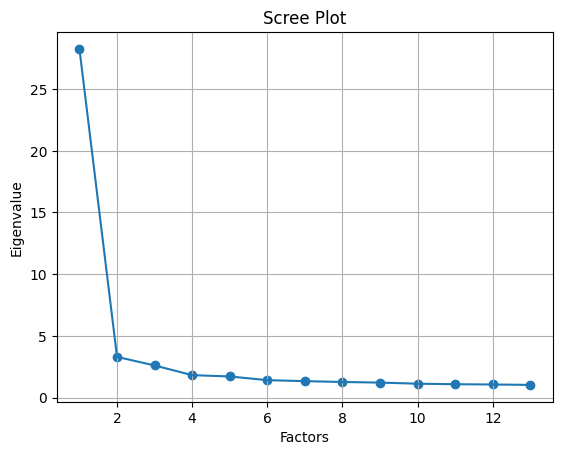

In [10]:
vizer.scree_plot(ev[:13])

This is somewhat helpful, but choosing the number of factors is pretty hard and different folks will give different answers. An argument could be made for only 1 factor here. You could also argue that there is an "elbow" at 4, indicating we should choose 3 factors. Or maybe even an elbow at 6 and choose 5. How we choose here should include looking at what scale items would fall in each factor if we tried 3 or 5 factors. 

Another option is to use parallel analysis, which I'll try next. 

Planned next steps:
- Parallel analysis for choosing the number of factors
- Examining factor loadings to decide on the correct number of factors (do the items in each factor make sense?) and to remove scale items that don't contribute well to any factor. 
    - I'll get some output together that shows what items fall under what factor, for each of the potential factor solutions. Then John and Patty can give input on how many factors we should use, and what items we should remove. 